# Chapter 4: Training Models

## Linear regression

A linear regression model takes input features $x_1,...,x_n$ and predicts an output $y$ as:

\begin{align}
y = h_{\theta_0,...,\theta_n}(x_1,...,x_n) = \theta_0 + \sum\limits_{i=1,...,n} \theta_i x_i
\end{align}

where $\theta_0,...,\theta_n$ are the model parameters and $h$ is called the hypothesis function.

In vectorized form, the equation can be expressed as:

\begin{align}
y = h_{\theta}(X) = \theta^T * x
\end{align}

where $\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n\end{bmatrix}$ and 
$x = \begin{bmatrix} 1 \\ x_1 \\ \vdots \\ x_n\end{bmatrix}$.

#### Mean squared error

Given a set of parameters $\theta$ and $m$ samples with input $x^{(i)}$ and target values $y^{(i)}$ for $i=1,...,m$, the mean squared error (MSE) of the samples and hypothesis function is defined as:

$MSE(X,h_{\theta}) = \frac{1}{m} \sum\limits_{i=1,...,m} (\theta^T * x^{(i)} - y^{(i)})^2$

## Normal equation

The MSE w.r.t. the model parameters can be
minimized by solving a single closed form matrix equation:
    
$\hat{\theta} = (X^T * X)^{-1} * X^T * y$

Notice that in this case, $X$ and $y$ contain all the $m$ training samples. In other words:

$X^T = \begin{bmatrix} 1 & ... & 1 \\ x^{(1)}_1 & ... & x^{(m)}_1 \\ \vdots & \ddots & \vdots \\ x^{(1)}_n & ... & x^{(m)}_n \end{bmatrix}$ and 
$y = \begin{bmatrix} y^{(1)} \\ \vdots \\ y^{(m)}\end{bmatrix}$

In [10]:
import numpy as np
np.random.seed(42)
X = 2 * np.random.rand(100, 1) # 100 samples with 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) # 100 sample targets

def normal_equation(X,y):
    X_b = np.c_[np.ones((100, 1)), X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

theta_best = normal_equation(X,y)

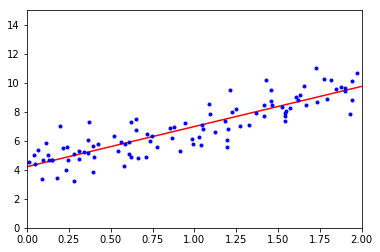

In [20]:
import matplotlib
import matplotlib.pyplot as plt
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-") # add line '-'
plt.plot(X, y, "b.") # add samples as dots '.'
plt.axis([0, 2, 0, 15]) # set bounds
plt.show()

#### Notes:
* Normal equations require matrix multiplication and finding the inverse of $X^T * X$ which is almost cubic complexity depending on the implementation.
* It scales badly with the number of features (slow for 100,000). This is because $X^T * X \in \mathbb{R}^{(n+1) \times (n+1)}$ with $n$ the number of features.
* It scales well with the number of training samples because this just makes the matrix multiplications more complex but not calculating the inverse.

## Gradient Descent